# Dependency

In [10]:
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [11]:
import json
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from neel_plotly import imshow
from collections import defaultdict
import plotly.graph_objects as go
from functools import partial
import random
from collections import defaultdict, OrderedDict
import pickle
import plotly
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.colors import Normalize
from matplotlib.patches import Patch
import matplotlib.cm as cm
import colorsys

In [12]:
import sklearn
from sklearn import datasets
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle

from sklearn.decomposition import PCA
from sklearn import linear_model

# Activation Visualization

### Emb. Extraction Mod.

In [3]:
def load_emb(data_tp, input_tp, layer=15, nb=200, mod="llama", use_vari=False, onehot=False):
    sd = "../data_table_emb/"
    sf = sd + f"{mod}_l{layer}_{data_tp}_{input_tp}.pt"
    
    data = torch.load(sf)
    xs_ent1 = data["ent1"].cpu().numpy()[:nb, :]
    xs_ent2 = data["ent2"].cpu().numpy()[:nb, :]
    xs_ent3 = data["ent3"].cpu().numpy()[:nb, :]
    
    xs_att1_1 = data["att1_1"].cpu().numpy()[:nb, :]
    xs_att1_2 = data["att1_2"].cpu().numpy()[:nb, :]
    xs_att1_3 = data["att1_3"].cpu().numpy()[:nb, :]
    
    xs_att2_1 = data["att2_1"].cpu().numpy()[:nb, :]
    xs_att2_2 = data["att2_2"].cpu().numpy()[:nb, :]
    xs_att2_3 = data["att2_3"].cpu().numpy()[:nb, :]
    
    xs_att3_1 = data["att3_1"].cpu().numpy()[:nb, :]
    xs_att3_2 = data["att3_2"].cpu().numpy()[:nb, :]
    xs_att3_3 = data["att3_3"].cpu().numpy()[:nb, :]
    
    xs_att4_1 = data["att4_1"].cpu().numpy()[:nb, :]
    xs_att4_2 = data["att4_2"].cpu().numpy()[:nb, :]
    xs_att4_3 = data["att4_3"].cpu().numpy()[:nb, :]
    
    yi_ent1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_ent2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_ent3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att1_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att1_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att1_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att2_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att2_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att2_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att3_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att3_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att3_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att4_1 = data["xi"].cpu().numpy()[:nb, 0]
    yi_att4_2 = data["xi"].cpu().numpy()[:nb, 1]
    yi_att4_3 = data["xi"].cpu().numpy()[:nb, 2]
    
    xi_ent1 = data["xi"].cpu().numpy()[:nb, 0]
    xi_ent2 = data["xi"].cpu().numpy()[:nb, 0]
    xi_ent3 = data["xi"].cpu().numpy()[:nb, 0]
    
    xi_att1_1 = data["xi"].cpu().numpy()[:nb, 1]
    xi_att1_2 = data["xi"].cpu().numpy()[:nb, 1]
    xi_att1_3 = data["xi"].cpu().numpy()[:nb, 1]
    
    xi_att2_1 = data["xi"].cpu().numpy()[:nb, 2]
    xi_att2_2 = data["xi"].cpu().numpy()[:nb, 2]
    xi_att2_3 = data["xi"].cpu().numpy()[:nb, 2]
    
    xi_att3_1 = data["xi"].cpu().numpy()[:nb, 3]
    xi_att3_2 = data["xi"].cpu().numpy()[:nb, 3]
    xi_att3_3 = data["xi"].cpu().numpy()[:nb, 3]
    
    xi_att4_1 = data["xi"].cpu().numpy()[:nb, 4]
    xi_att4_2 = data["xi"].cpu().numpy()[:nb, 4]
    xi_att4_3 = data["xi"].cpu().numpy()[:nb, 4]
    
    zi_ent1 = data["zi"].cpu().numpy()[:nb, 0]
    zi_ent2 = data["zi"].cpu().numpy()[:nb, 0]
    zi_ent3 = data["zi"].cpu().numpy()[:nb, 0]
    
    zi_att1_1 = data["xi"].cpu().numpy()[:nb, 1]
    zi_att1_2 = data["xi"].cpu().numpy()[:nb, 1]
    zi_att1_3 = data["xi"].cpu().numpy()[:nb, 1]
    
    zi_att2_1 = data["zi"].cpu().numpy()[:nb, 2]
    zi_att2_2 = data["zi"].cpu().numpy()[:nb, 2]
    zi_att2_3 = data["zi"].cpu().numpy()[:nb, 2]
    
    zi_att3_1 = data["zi"].cpu().numpy()[:nb, 3]
    zi_att3_2 = data["zi"].cpu().numpy()[:nb, 3]
    zi_att3_3 = data["zi"].cpu().numpy()[:nb, 3]
    
    zi_att4_1 = data["zi"].cpu().numpy()[:nb, 4]
    zi_att4_2 = data["zi"].cpu().numpy()[:nb, 4]
    zi_att4_3 = data["zi"].cpu().numpy()[:nb, 4]
    
    embs = np.concatenate([xs_att1_1, xs_att1_2, xs_att1_3,
                           xs_att2_1, xs_att2_2, xs_att2_3,
                           xs_att3_1, xs_att3_2, xs_att3_3,
                           xs_att4_1, xs_att4_2, xs_att4_3,], axis=0)
    
    yis = []
    xis = []
    zis = []
    
    yis.extend(yi_att1_1)
    yis.extend(yi_att1_2)
    yis.extend(yi_att1_3)
    yis.extend(yi_att2_1)
    yis.extend(yi_att2_2)
    yis.extend(yi_att2_3)
    yis.extend(yi_att3_1)
    yis.extend(yi_att3_2)
    yis.extend(yi_att3_3)
    yis.extend(yi_att4_1)
    yis.extend(yi_att4_2)
    yis.extend(yi_att4_3)
    
    xis.extend(xi_att1_1)
    xis.extend(xi_att1_2)
    xis.extend(xi_att1_3)
    xis.extend(xi_att2_1)
    xis.extend(xi_att2_2)
    xis.extend(xi_att2_3)
    xis.extend(xi_att3_1)
    xis.extend(xi_att3_2)
    xis.extend(xi_att3_3)
    xis.extend(xi_att4_1)
    xis.extend(xi_att4_2)
    xis.extend(xi_att4_3)
    
    zis.extend(zi_att1_1)
    zis.extend(zi_att1_2)
    zis.extend(zi_att1_3)
    zis.extend(zi_att2_1)
    zis.extend(zi_att2_2)
    zis.extend(zi_att2_3)
    zis.extend(zi_att3_1)
    zis.extend(zi_att3_2)
    zis.extend(zi_att3_3)
    zis.extend(zi_att4_1)
    zis.extend(zi_att4_2)
    zis.extend(zi_att4_3)
    
    inds_yx = np.stack((yis, xis), axis=1)
    inds_yz = np.stack((yis, zis), axis=1)
    
    if onehot:
        class_idx = inds_yz[:, 1]
        #num_classes = class_idx.max() + 1
        num_classes = 10
        one_hot = np.eye(num_classes)[class_idx]
        inds_yz = np.concatenate([inds_yz[:, [0]], one_hot], axis=1)
    
        class_idx = inds_yzcr[:, 1]
        #num_classes = class_idx.max() + 1
        num_classes = 10
        one_hot = np.eye(num_classes)[class_idx]
    
    return embs, inds_yx, inds_yz

### Visualization Mod.

In [5]:
def lsar(W, k, returns_all=True):
    # W: d x D
    d, D = W.shape

    wc = W @ np.ones(D) / D
    u, s, vh = np.linalg.svd(W - wc.reshape(-1, 1) @ np.ones((1, D)))
    Ws, Gamma  = u[:, :k], vh.T[:, :k] @ np.diag(s[:k])
    best_fit_W = wc.reshape(-1, 1) @ np.ones((1, D)) + Ws @ Gamma.T

    wc_new = np.linalg.pinv(best_fit_W).T @ np.ones(D)
    wc_new /= (wc_new ** 2).sum()
    prod = best_fit_W - wc_new.reshape(-1, 1) @ np.ones((1, D))
    #print(np.linalg.norm(W - wc_new.reshape(-1, 1) @ np.ones((1, D)) - prod, axis=0))

    if returns_all:
        u, s, vh = np.linalg.svd(prod)
        Ws_new, Gamma_new = u[:, :k], vh.T[:, :k] @ np.diag(s[:k])
        print(Ws_new.shape, Gamma_new.shape)
        return wc_new, prod, Ws_new, Gamma_new

    return wc_new, prod


def visualize_emb(data, V, inds_yx, pc1=1, pc2=2, title=""):
    color_groups = np.array([
        ["#e41a1c", "#fb8072", "#8b0000"],  # Red group
        ["#377eb8", "#80b1d3", "#00008b"],  # Blue group
        ["#4daf4a", "#a6d854", "#006400"],  # Green group
        ["#984ea3", "#cab2d6", "#4b0082"],  # Purple group
        ["#ff7f00", "#fdb462", "#8b4513"],  # Orange group
        ["#ffff33", "#f0e442", "#9acd32"],  # Yellow group
        ["#a65628", "#d9d9d9", "#654321"],  # Brown/Gray group
        ["#f781bf", "#fccde5", "#c71585"],  # Pink/Magenta group
        ["#00ced1", "#b3e2cd", "#008b8b"],  # Cyan/Teal group
        ["#999999", "#cccccc", "#333333"],  # Neutral/Gray group
    ])
    scaled_data = data
    print(V.shape)
    principal_components = V[:, :10]
    proj_data = np.matmul(scaled_data, principal_components)
    nb_data = proj_data.shape[0]
    for i in range(nb_data):
        p2, p1 = inds_yx[i]
        plt.scatter(proj_data[i, pc1], proj_data[i, pc2], label=f"ri: {p1-1}; ei: {p2}", 
                    color=color_groups[p1-1, p2-1])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), 
               loc="upper left")
    plt.title(title)
    plt.show()
    
    
def visualize_emb_via_colormap(data, V, inds_yx, pc1=0, pc2=1, title=""):
    scaled_data = data
    principal_components = V[:, :10]
    proj_data = np.matmul(scaled_data, principal_components)
    x, y = proj_data[:, pc1], proj_data[:, pc2]
    x_class = inds_yx[:,1]
    y_class = inds_yx[:,0]
    
    cmap = cm.get_cmap("viridis_r")
    base_colors = [cmap(v)[:3] for v in np.linspace(0.15, 0.85, 3)]
    
    lightness_levels = [0.2, 0.4, 0.6, 0.8]

    def adjust_lightness(rgb, target_lightness):
        """Adjust RGB color to target lightness in HLS space."""
        h, l, s = colorsys.rgb_to_hls(*rgb)
        return np.clip(colorsys.hls_to_rgb(h, target_lightness, s), 0, 1)

    color_grid = np.zeros((4, 3, 3))
    for i in range(4):  # x clusters
        for j in range(3):  # y clusters
            color_grid[i, j] = adjust_lightness(base_colors[j], lightness_levels[i])

    colors = np.array([color_grid[x_class[i]-2, y_class[i]-1] for i in range(len(x))])
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c=colors, s=70, edgecolor="none", alpha=0.75)
    plt.title(title)
    plt.xlabel("PLS Component 1")
    plt.ylabel("PLS Component 2")

    legend_elements = []
    for i in range(3):
        for j in range(4):
            label = f"ei:{i+1}, ri:{j+1}"
            legend_elements.append(
                Patch(facecolor=color_grid[j, i], edgecolor='none', label=label)
            )
    
    plt.legend(
        handles=legend_elements,
        #title="(x_class, y_class)",
        ncol=3,
        fontsize=8,
        frameon=False
    )

    plt.tight_layout()
    plt.show()

In [4]:
def save_proj(llm_tp, layer, data_tp, proj):
    sd = "../data_emb/"
    sf = sd + f"{llm_tp}_l{layer}_{data_tp}_proj.npy"
    np.save(sf, proj)
    
def visualze_activation(layer=15, data_tp="city", mod="llama", oh=False, vari="r_cr", xtp="r",
                        visualize_temp=False):#TODO
    embs_ta, inds_ta_i, inds_ta_r = load_emb(data_tp, "table", layer=layer, vari=vari, onehot=oh, mod=mod)
    embs_te, inds_te_i, inds_te_r = load_emb(data_tp, "temp", layer=layer, vari=vari, onehot=oh, mod=mod)
    embs_st, inds_st_i, inds_st_r = load_emb(data_tp, "story", layer=layer, vari=vari, onehot=oh, mod=mod)
    
    embs = np.concatenate([embs_ta, embs_te, embs_st,], axis=0)
    inds_i = np.concatenate([inds_ta_i, inds_te_i, inds_st_i,], axis=0)
    inds_r = np.concatenate([inds_ta_r, inds_te_r, inds_st_r,], axis=0)
    
    ###Projection Matrix###
    pls_model_i = PLSRegression(n_components=10)
    pls_model_i.fit(embs, inds_i)
    W = pls_model_i.x_weights_
    V_re_i, _ = np.linalg.qr(W)
    save_proj(mod, layer, "i_%s"%data_tp, V_re_i)

    pls_model_r = PLSRegression(n_components=10)
    pls_model_r.fit(embs, inds_r)
    W = pls_model_r.x_weights_
    V_re_r, _ = np.linalg.qr(W)
    save_proj(mod, layer, "r_%s"%data_tp, V_re_r)
    ###
    
    if xtp == "i":
        V_re = V_re_i
        x_type = "Ord. Idx"
    elif xtp == "r":
        V_re = V_re_r
        x_type = "Rel. Idx"
        
    if data_tp == "space":
        title = "country"
    elif data_tp == "create":
        title = "object"
    else:
        title = data_tp
        
    if visualize_temp:
        print(f"Visualization on {data_tp} and table via {x_type} ...")
        visualize_emb_via_colormap(embs_ta, V_re, inds_ta_i, pc1=0, pc2=1, title=f"Table: {title}")

        print(f"Visualization on {data_tp} and temp via {x_type} ...")
        visualize_emb_via_colormap(embs_te, V_re, inds_ta_i, pc1=0, pc2=1, title=f"Template: {title}")

    print(f"Visualization on {data_tp} and story via {x_type} ...")
    visualize_emb_via_colormap(embs_st, V_re, inds_st_i, pc1=0, pc2=1, title=f"Story: {title}")

### Visualizing ...

In [8]:
layer = 15
llm_tp = "llama"

Visualization on space and story via Ord. Idx ...


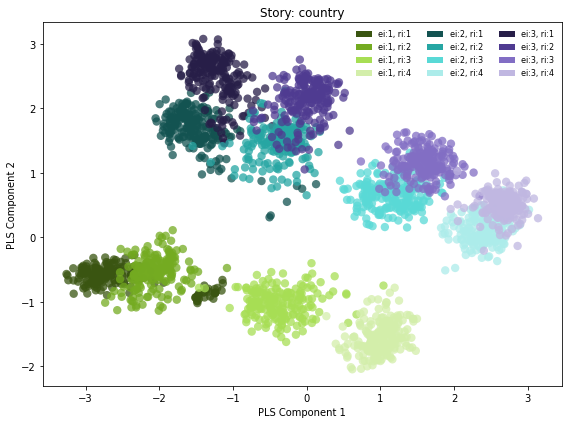

In [9]:
for data_tp in ["space", "city", "relation", "job", "create"][:1]:
    visualze_activation(layer=layer, data_tp=data_tp, mod=llm_tp, vari="r_cr", xtp="i")

Visualization on space and story via Ord. Idx ...


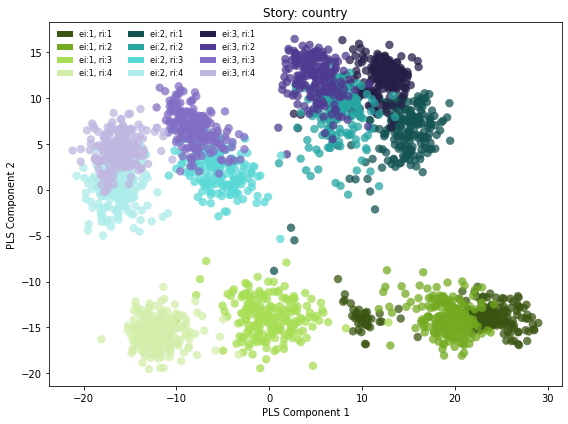

In [10]:
llm_tp = "qwen"
for data_tp in ["space", "city", "relation", "job", "create"][:1]:
    visualze_activation(layer=layer, data_tp=data_tp, mod=llm_tp, vari="r_cr", xtp="i")

# PLS for Predicting IRS Indices

### Regression Mod.

In [11]:
def optimise_pls_cv(X_train, y_train, n_comp, X_test, y_test):
    # Define PLS object
    pls_model = PLSRegression(n_components=n_comp)
    # Calculate scores
    pls_model.fit(X_train, y_train)
    y_pred = pls_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return (r2, mse)


def extract_r2_pls(X_train, y_train, X_test, y_test):
    r2s = []
    mses = []
    xticks = np.arange(1, 50)
    for n_comp in tqdm(xticks):
        r2, mse = optimise_pls_cv(X_train, y_train, n_comp, X_test, y_test)
        r2s.append(r2)
        mses.append(mse)
    return r2s, mses


def simple_regression(X_train, y_train, X_test, y_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    r2_sc = r2_score(y_test, y_pred)
    mse_sc = mean_squared_error(y_test, y_pred) 
    return(r2_sc, mse_sc)


def extract_r2_pcr(X_train, y_train, X_test, y_test):
    Xstd_train = StandardScaler().fit_transform(X_train)
    Xstd_test = StandardScaler().fit_transform(X_test)
    r2s = []
    mses = []
    xticks = np.arange(1, 50)
    for n_comp in tqdm(xticks):
        pca = PCA(n_components=n_comp)
        pca.fit(Xstd_train)
        Xreg_train = pca.transform(Xstd_train)
        Xreg_test = pca.transform(Xstd_test)
        r2_sc, mse_sc = simple_regression(Xreg_train, y_train, Xreg_test, y_test)
        r2s.append(r2_sc)
        mses.append(mse_sc)
    return(r2s, mses)

In [12]:
def plot_metrics_compare(vals1, vals2, ylabel, objective="min", lg=0, rn=10):
    xticks = np.arange(1, len(vals1) + 1)[:rn]
    with plt.style.context("seaborn-whitegrid"):
        plt.plot(xticks[:rn], np.array(vals1)[:rn], '-v', color='blue', mfc='blue')
        plt.plot(xticks[:rn], np.array(vals2)[:rn], '-v', color='grey', mfc='grey')
        if objective=='min':
            idx1 = np.argmin(vals1)
            idx2 = np.argmin(vals2)
        else:
            idx1 = np.argmax(vals1)
            idx2 = np.argmax(vals2)
        
        if lg == 0:
            plt.legend(["PLS", "PCA"], loc="lower right", fontsize=10)
        elif lg == 1:
            plt.legend(["PLS (Ent.)", "PLS (Att.)"], loc="lower right", fontsize=10)
        elif lg == 2:
            plt.legend(["PCA (Ent.)", "PCA (Att.)"], loc="lower right", fontsize=10)
        
        plt.xlabel('Number of Components')
        plt.xticks = xticks
        plt.ylabel(ylabel)

    plt.show()
    

def plot_metrics_compare_mul(vals1, vals2, vals3, vals4, ylabel, objective="min", 
                             lg=0, rn=10, title="", rand=False, use_legend=True):
    xticks = np.arange(1, len(vals1) + 1)[:rn]
    with plt.style.context("seaborn-whitegrid"):
        plt.plot(xticks[:rn], np.array(vals1)[:rn], '-', color='blue', mfc='blue')
        plt.plot(xticks[:rn], np.array(vals2)[:rn], '--', color='blue', mfc='blue')
        plt.plot(xticks[:rn], np.array(vals3)[:rn], '-', color='grey', mfc='grey')
        plt.plot(xticks[:rn], np.array(vals4)[:rn], '--', color='grey', mfc='grey')
        if objective=='min':
            idx1 = np.argmin(vals1)
            idx2 = np.argmin(vals2)
        else:
            idx1 = np.argmax(vals1)
            idx2 = np.argmax(vals2)
        
        if lg == 0:
            if rand:
                if use_legend:
                    plt.legend(["PLS", "PCA", "PLS (Random)", "PCA (Random)"], 
                               loc="center right", fontsize=10)
            else:
                if use_legend:
                    plt.legend(["PLS (Rel. Idx)", "PCA (Rel. Idx)", "PLS (Ord. Idx)", "PCA (Ord. Idx)",], 
                               loc="lower right", fontsize=10)
                
        elif lg == 1:
            plt.legend(["PLS (Ent.)", "PLS (Att.)"], loc="lower right", fontsize=10)
        elif lg == 2:
            plt.legend(["PCA (Ent.)", "PCA (Att.)"], loc="lower right", fontsize=10)
        
        plt.xlabel('Number of Components')
        plt.xticks = xticks
        if title != "":
            plt.title(title)
        plt.ylabel(ylabel)

    plt.show()

### Loading Emb. Mod.

In [5]:
def load_emb_pls(data_tp, input_tp, layer=15, nb=200, mod="llama", 
             relind=False, reverse=False, xy=False):
    sd = "../data_emb/"
    #e.g., llama_l15_city_story_cr_p_cr.pt
    sf = sd + f"{mod}_l{layer}_{data_tp}_{input_tp}.pt"
    data = torch.load(sf, map_location="cpu")
    xs_ent1 = data["ent1"].cpu().numpy()[:nb, :]
    xs_ent2 = data["ent2"].cpu().numpy()[:nb, :]
    xs_ent3 = data["ent3"].cpu().numpy()[:nb, :]
    
    yis = []
    xis = []
    
    xs_att1_1 = data["att1_1"].cpu().numpy()[:nb, :]
    xs_att1_2 = data["att1_2"].cpu().numpy()[:nb, :]
    xs_att1_3 = data["att1_3"].cpu().numpy()[:nb, :]
        
    xs_att2_1 = data["att2_1"].cpu().numpy()[:nb, :]
    xs_att2_2 = data["att2_2"].cpu().numpy()[:nb, :]
    xs_att2_3 = data["att2_3"].cpu().numpy()[:nb, :]
        
    xs_att3_1 = data["att3_1"].cpu().numpy()[:nb, :]
    xs_att3_2 = data["att3_2"].cpu().numpy()[:nb, :]
    xs_att3_3 = data["att3_3"].cpu().numpy()[:nb, :]
    
    xs_att4_1 = data["att4_1"].cpu().numpy()[:nb, :]
    xs_att4_2 = data["att4_2"].cpu().numpy()[:nb, :]
    xs_att4_3 = data["att4_3"].cpu().numpy()[:nb, :]
    
    yi_ent1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_ent2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_ent3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att1_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att1_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att1_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att2_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att2_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att2_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att3_1 = data["yi"].cpu().numpy()[:nb, 0]
    yi_att3_2 = data["yi"].cpu().numpy()[:nb, 1]
    yi_att3_3 = data["yi"].cpu().numpy()[:nb, 2]
    
    yi_att4_1 = data["xi"].cpu().numpy()[:nb, 0]
    yi_att4_2 = data["xi"].cpu().numpy()[:nb, 1]
    yi_att4_3 = data["xi"].cpu().numpy()[:nb, 2]
        
    xi_att1_1 = data["xi"].cpu().numpy()[:nb, 1]
    xi_att1_2 = data["xi"].cpu().numpy()[:nb, 1]
    xi_att1_3 = data["xi"].cpu().numpy()[:nb, 1]
        
    xi_att2_1 = data["xi"].cpu().numpy()[:nb, 2]
    xi_att2_2 = data["xi"].cpu().numpy()[:nb, 2]
    xi_att2_3 = data["xi"].cpu().numpy()[:nb, 2]
    
    xi_att3_1 = data["xi"].cpu().numpy()[:nb, 3]
    xi_att3_2 = data["xi"].cpu().numpy()[:nb, 3]
    xi_att3_3 = data["xi"].cpu().numpy()[:nb, 3]
    
    xi_att4_1 = data["xi"].cpu().numpy()[:nb, 4]
    xi_att4_2 = data["xi"].cpu().numpy()[:nb, 4]
    xi_att4_3 = data["xi"].cpu().numpy()[:nb, 4]
        
    embs = np.concatenate([xs_att1_1, xs_att1_2, xs_att1_3,
                           xs_att2_1, xs_att2_2, xs_att2_3,
                           xs_att3_1, xs_att3_2, xs_att3_3,
                           xs_att4_1, xs_att4_2, xs_att4_3,], axis=0)
        
    yis.extend(yi_att1_1)
    yis.extend(yi_att1_2)
    yis.extend(yi_att1_3)
    yis.extend(yi_att2_1)
    yis.extend(yi_att2_2)
    yis.extend(yi_att2_3)
    yis.extend(yi_att3_1)
    yis.extend(yi_att3_2)
    yis.extend(yi_att3_3)
    yis.extend(yi_att4_1)
    yis.extend(yi_att4_2)
    yis.extend(yi_att4_3)
    
    xis.extend(xi_att1_1)
    xis.extend(xi_att1_2)
    xis.extend(xi_att1_3)
    xis.extend(xi_att2_1)
    xis.extend(xi_att2_2)
    xis.extend(xi_att2_3)
    xis.extend(xi_att3_1)
    xis.extend(xi_att3_2)
    xis.extend(xi_att3_3)
    xis.extend(xi_att4_1)
    xis.extend(xi_att4_2)
    xis.extend(xi_att4_3)    
    
    inds_yx = np.stack((yis, xis), axis=1)
    inds_yz = np.stack((yis, xis), axis=1)
    
    class_idx = inds_yz[:, 0]
    #num_classes = 6
    y_num_classes = class_idx.max() + 1
    y_one_hot = np.eye(y_num_classes)[class_idx]
    
    class_idx = inds_yz[:, 1]
    x_num_classes = class_idx.max() + 1
    #num_classes = 6
    x_one_hot = np.eye(x_num_classes)[class_idx]
    #inds_yz = np.concatenate([inds_yz[:, [0]], x_one_hot], axis=1)
    if xy:
        inds_yz = np.concatenate([inds_yz[:, [0]], x_one_hot], axis=1)
    else:
        inds_yz = x_one_hot
    
    n = inds_yx.shape[0]
    num_y = y_num_classes
    num_x = x_num_classes
    inds_yx_rand = np.column_stack([
        np.random.randint(1, num_y, n),
        np.random.randint(1, num_x, n)])
    
    class_idx = inds_yx_rand[:, 1]
    x_num_classes = class_idx.max() + 1
    x_one_hot = np.eye(x_num_classes)[class_idx]
    if xy:
        inds_yz = np.concatenate([inds_yx_rand[:, 0], x_one_hot], axis=1)
    else:
        inds_yx_rand = x_one_hot
    if reverse:
        return embs, inds_yx[:, ::-1], inds_yz[:, ::-1], inds_yx_rand[:, ::-1]
    else:
        return embs, inds_yx, inds_yz, inds_yx_rand

In [24]:
def analyze_regression(data_tp="city", layer=15, use_te=False, 
                       mod="llama", oh=False, rand=False, title="", use_legend=True):
    embs_te_ab_ri, inds_te_i_ab_ri, inds_te_oh_ab_ri, inds_te_oh_ab_rand_ri = load_emb_pls(data_tp, "temp", 
                                                                                       layer=layer, 
                                                                                       relind=True, mod=mod)
    embs_st_ab_ri, inds_st_i_ab_ri, inds_st_oh_ab_ri, inds_st_oh_ab_rand_ri = load_emb_pls(data_tp, "story", 
                                                                                       layer=layer, 
                                                                                       relind=True, mod=mod)

    embs_te_ab_oi, inds_te_i_ab_oi, inds_te_oh_ab_oi, inds_te_oh_ab_rand_oi = load_emb_pls(data_tp, "temp", 
                                                                                       layer=layer, 
                                                                                       mod=mod)
    embs_st_ab_oi, inds_st_i_ab_oi, inds_st_oh_ab_oi, inds_st_oh_ab_rand_oi = load_emb_pls(data_tp, "story", 
                                                                                       layer=layer, 
                                                                                       mod=mod)

    if use_te:
        embs = np.concatenate([embs_te_ab_ri, embs_st_ab_ri,], axis=0)[:, :]
        if oh:
            inds_i_ri = np.concatenate([inds_te_oh_ab_ri, inds_st_oh_ab_ri,], axis=0)[:, :]
            if rand:
                inds_i_oi = np.concatenate([inds_te_oh_ab_rand_ri, inds_st_oh_ab_rand_ri,], axis=0)[:, :]
            else:
                inds_i_oi = np.concatenate([inds_te_oh_ab_oi, inds_st_oh_ab_oi,], axis=0)[:, :]
        else:
            inds_i_ri = np.concatenate([inds_te_i_ab_ri, inds_st_i_ab_ri,], axis=0)[:, :]
            if rand:
                inds_i_oi = np.concatenate([inds_te_i_oh_ab_rand_ri, inds_st_oh_ab_rand_ri,], axis=0)[:, :]
            else:
                inds_i_oi = np.concatenate([inds_te_i_ab_oi, inds_st_i_ab_oi,], axis=0)[:, :]
    else:
        embs = np.concatenate([embs_st_ab_ri,], axis=0)[:, :]
        if oh:
            inds_i_ri = np.concatenate([inds_st_oh_ab_ri,], axis=0)[:, :]
            if rand:
                inds_i_oi = np.concatenate([inds_st_oh_ab_rand_ri,], axis=0)[:, :]
            else:
                inds_i_oi = np.concatenate([inds_st_oh_ab_oi,], axis=0)[:, :]
        else:
            inds_i_ri = np.concatenate([inds_st_i_ab_ri,], axis=0)[:, :]
            if rand:
                inds_i_oi = np.concatenate([inds_st_oh_ab_rand_ri,], axis=0)[:, :]
            else:
                inds_i_oi = np.concatenate([inds_st_i_ab_oi,], axis=0)[:, :]
    
    embs_train_ri, embs_test_ri, ys_train_ri, ys_test_ri = train_test_split(embs, inds_i_ri, test_size=0.5, random_state=42)
    embs_train_oi, embs_test_oi, ys_train_oi, ys_test_oi = train_test_split(embs, inds_i_oi, test_size=0.5, random_state=42)
    
    r2_pls_ri, mse_pls_ri = extract_r2_pls(embs_train_ri, ys_train_ri, embs_test_ri, ys_test_ri)
    r2_pcr_ri, mse_pcr_ri = extract_r2_pcr(embs_train_ri, ys_train_ri, embs_test_ri, ys_test_ri)
    
    r2_pls_oi, mse_pls_oi = extract_r2_pls(embs_train_oi, ys_train_oi, embs_test_oi, ys_test_oi)
    r2_pcr_oi, mse_pcr_oi = extract_r2_pcr(embs_train_oi, ys_train_oi, embs_test_oi, ys_test_oi)
    
    plot_metrics_compare_mul(r2_pls_ri, r2_pcr_ri, r2_pls_oi, r2_pcr_oi, f'Fitness ($R^2$)', 
                             rn=50, rand=rand, title=title, use_legend=use_legend)

### Analyzing ...

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:45<00:00,  1.08it/s]


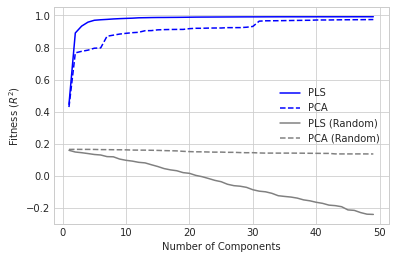

country dataset


In [25]:
data_tps = ["space", "city", "relation", "job", "create"][:1]
for data_tp in data_tps:
    if data_tp == "space":
        title = "country dataset"
    elif data_tp == "create":
        title = "object dataset"
    else:
        title = f"{data_tp} dataset"
    analyze_regression(data_tp, layer=15, oh=False, rand=True, title="") 
    print(title)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:34<00:00,  1.42it/s]


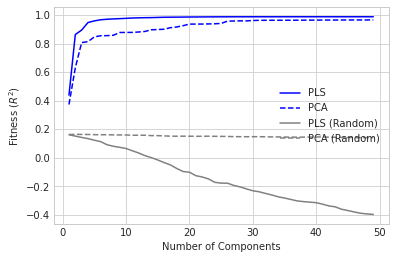

country dataset


In [16]:
for data_tp in data_tps:
    if data_tp == "space":
        title = "country dataset"
    elif data_tp == "create":
        title = "object dataset"
    else:
        title = f"{data_tp} dataset"
    analyze_regression(data_tp, layer=15, mod="qwen", oh=False, rand=True, title="")
    print(title)

# Generality Analysis

### Analyzing Mod.

In [66]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)

def get_xy(mod="llama", data_tp="city", layer=15):
    embs_ta, inds_ta_i, inds_ta_r = load_emb(data_tp, "table", layer=layer, mod=mod)
    embs_te, inds_te_i, inds_te_r = load_emb(data_tp, "temp", layer=layer, mod=mod)
    embs_st, inds_st_i, inds_st_r = load_emb(data_tp, "story", layer=layer, mod=mod)

    #embs = np.concatenate([embs_ta, embs_te, embs_st,], axis=0)[:, :]
    #inds_i = np.concatenate([inds_ta_i, inds_te_i, inds_st_i,], axis=0)[:, :]
    embs = np.concatenate([embs_te, embs_st,], axis=0)[:, :]
    inds_i = np.concatenate([inds_te_i, inds_st_i,], axis=0)[:, :]
    return embs, inds_i

def analyze_generality(mod="llama", layer=15, pls_dim=5):
    data_tps = ["relation", "city", "create", "job", "space"]
    d_dtp_mod = {}
    d_dtp_test = {}
    for data_tp in data_tps:
        embs, inds = get_xy(mod=mod, data_tp=data_tp, layer=layer)
        embs_train, embs_test, ys_train, ys_test = train_test_split(embs, inds, test_size=0.3, random_state=42)
        pls_model = PLSRegression(n_components=pls_dim)
        pls_model.fit(embs_train, ys_train)
        d_dtp_mod[data_tp] = pls_model
        d_dtp_test[data_tp] = (embs_test, ys_test)
        
    lst_r2s = []
    for i, data_tp in enumerate(data_tps):
        pls_model = d_dtp_mod[data_tp]
        r2s = []
        for data_tp_ in data_tps:
            embs_test, ys_test = d_dtp_test[data_tp_]
            ys_pred = pls_model.predict(embs_test)
            r2 = r2_score(ys_test, ys_pred)
            r2s.append(r2)
            
        lst_r2s.append(r2s)
        
    r2_scores = np.array(lst_r2s)
    # Example axis labels
    x_labels = ['relation', 'city', 'object', 'job', 'country']
    y_labels = ['relation', 'city', 'object', 'job', 'country']

    plt.figure(figsize=(7, 6))
    im = plt.imshow(r2_scores, cmap='viridis', vmin=0, vmax=1)

    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('R² score', rotation=270, labelpad=15)
    
    # Set tick labels
    plt.xticks(np.arange(len(x_labels)), x_labels, rotation=45, ha='right', fontsize=14)
    plt.yticks(np.arange(len(y_labels)), y_labels, fontsize=14)
    
    # Add title and axis labels
    plt.title('R² Score Heatmap')
    plt.xlabel('Predicted Data')
    plt.ylabel('Trained Data')

    # Annotate cells with R² values
    for i in range(r2_scores.shape[0]):
        for j in range(r2_scores.shape[1]):
            plt.text(j, i, f"{r2_scores[i, j]:.2f}", ha='center', va='center', 
                     color='black', fontsize=14)

    plt.tight_layout()
    plt.show()
        

### Analyzing ...

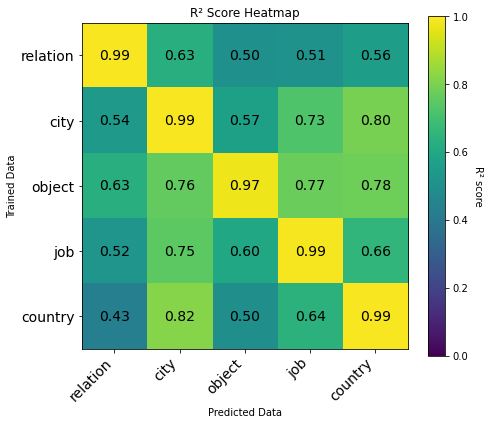

In [67]:
analyze_generality(mod="llama", layer=15, pls_dim=15)

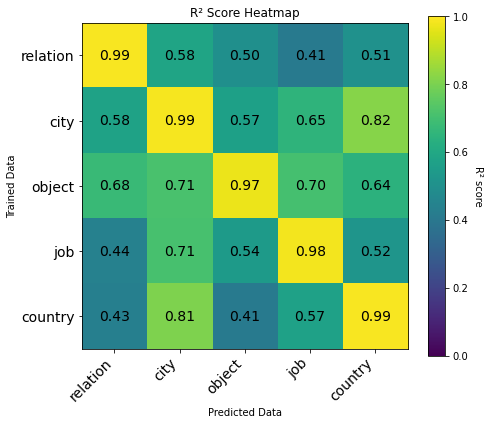

In [68]:
analyze_generality(mod="qwen", layer=15, pls_dim=15)

# Visualizing Perturbing Results

### Visualing Mod.

In [6]:
def extract_arrays(data_tp="space", projma=False, mod="llama", atti=3, input_tp="story"):
    sd = "../result/perturb/"#TODO
    if projma:
        sf = sd + f"ap_result_{mod}_{input_tp}_atti_{atti}_projma.json"
    else:
        sf = sd + f"ap_result_{mod}_{input_tp}_atti_{atti}_randma.json"
        
    with open(sf, 'r') as fle:
        dataset = json.load(fle)
    space = dataset[data_tp]
    x = np.array([float(k) for k in space.keys()])
    a = np.array([v["a"] for v in space.values()]) / 100.0
    a_std = np.array([v["astd"] for v in space.values()]) / 100.0
    a_cr = np.array([v["a_cr"] for v in space.values()]) / 100.0
    a_cr_std = np.array([v["astd_cr"] for v in space.values()]) / 100.0
    # sort
    sort_idx = np.argsort(x)
    return tuple(arr[sort_idx] for arr in [x, a, a_std, a_cr, a_cr_std])


def visualize_acc(data_tp="space", mod="llama", atti=3, input_tp="story"):
    x1, a1, a1_std, a1_cr, a1_cr_std = extract_arrays(data_tp=data_tp, mod=mod, projma=False, atti=atti, input_tp=input_tp)
    x2, a2, a2_std, a2_cr, a2_cr_std = extract_arrays(data_tp=data_tp, mod=mod, projma=True, atti=atti, input_tp=input_tp)

    # Plot combined
    plt.figure(figsize=(10,6))

    # Dataset 1
    plt.plot(x1, a1, label="Base", marker="o", color="black")
    plt.fill_between(x1, a1 - a1_std, a1 + a1_std, color="black", alpha=0.2)
    plt.plot(x1, a1_cr, label="Base + Intervention (Random)", marker="^", color="grey")
    plt.fill_between(x1, a1_cr - a1_cr_std, a1_cr + a1_cr_std, color="grey", alpha=0.2)

    # Dataset 2
    #plt.plot(x2, a2, label="Dataset2 Accuracy", marker="o", color="red")
    #plt.fill_between(x2, a2 - a2_std, a2 + a2_std, color="red", alpha=0.2)
    plt.plot(x2, a2_cr, label="Base + Intervention (Subspace)", marker="s", color="blue")
    plt.fill_between(x2, a2_cr - a2_cr_std, a2_cr + a2_cr_std, color="blue", alpha=0.2)

    alpha = r'$\alpha$'
    plt.xlabel(f"Hyperparameter ({alpha})")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.05)
    plt.xlim(0.1, 0.85)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    if data_tp == "space":
        title = "country"
    elif data_tp == "create":
        title = "object"
    else:
        title = data_tp
    plt.title(f"{input_tp}: {title}")
    plt.show()


### Visualizing ...

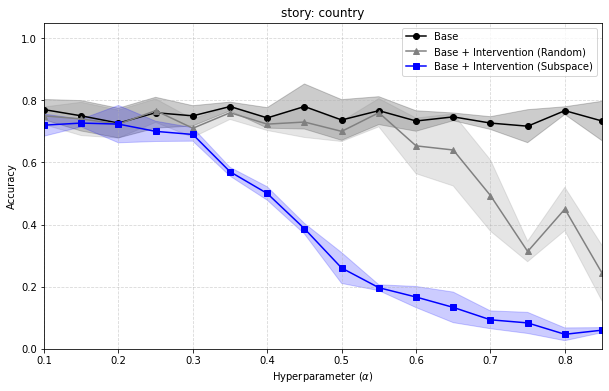

In [19]:
data_tps = ["space", "city", "relation", "job", "create"][:1]
for data_tp in data_tps:
    visualize_acc(data_tp=data_tp, mod="llama", atti=2)

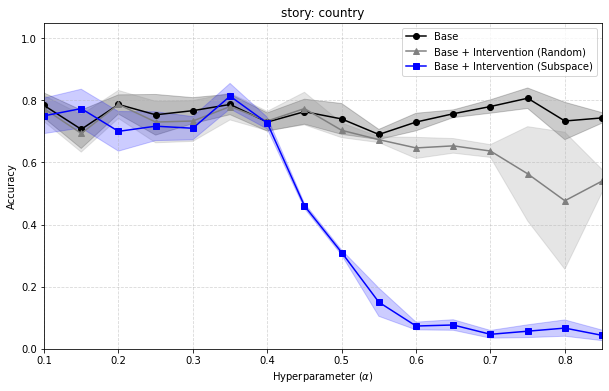

In [20]:
for data_tp in data_tps:
    visualize_acc(data_tp=data_tp, mod="qwen", atti=2)

# Visualizing Steering Results

### Visualizing Mod.

In [8]:
def visualize_steer_results(sd, mod="llama", atti=2, steer_tp="e_2_3", use_acc=False):
    sf = sd + f"ap_result_{mod}_story_atti_{atti}_{steer_tp}.json"
    with open(sf, 'r') as fle:
        data = json.load(fle)
    # === Extract data ===
    data_ = {}
    for k, v in data.items():
        if k == "create":
            k = "object"
        elif k == "space":
            k = "country"
        data_[k] = v
    data = data_
    entities = list(data.keys())
    if use_acc:
        l = [data[e]["a"] for e in entities]
        l_ap = [data[e]["a_ap"] for e in entities]
        l_cr = [data[e]["a_cr"] for e in entities]
        l_cr_ap = [data[e]["a_cr_ap"] for e in entities]

        lstd = [data[e]["astd"] for e in entities]
        lstd_ap = [data[e]["astd_ap"] for e in entities]
        lstd_cr = [data[e]["astd_cr"] for e in entities]
        lstd_cr_ap = [data[e]["astd_cr_ap"] for e in entities]
    else:
        l = [data[e]["l"] for e in entities]
        l_ap = [data[e]["l_ap"] for e in entities]
        l_cr = [data[e]["l_cr"] for e in entities]
        l_cr_ap = [data[e]["l_cr_ap"] for e in entities]

        lstd = [data[e]["lstd"] for e in entities]
        lstd_ap = [data[e]["lstd_ap"] for e in entities]
        lstd_cr = [data[e]["lstd_cr"] for e in entities]
        lstd_cr_ap = [data[e]["lstd_cr_ap"] for e in entities]

    # === Plot ===
    x = np.arange(len(entities))
    width = 0.18

    plt.figure(figsize=(10, 6))

    # Colors (two groups with similar tones)
    color_l_before = "#1f77b4"   # blue
    color_l_after = "#6baed6"    # light blue
    color_cr_before = "#ff7f0e"  # orange
    color_cr_after = "#fdae6b"   # light orange

    # Group 1: target
    plt.bar(x - width, l, width, yerr=lstd, label="Original", capsize=4, color=color_l_before)
    plt.bar(x, l_ap, width, yerr=lstd_ap, label="Original (Steered)", capsize=4, color=color_l_after)

    # Group 2: comparison
    plt.bar(x + width, l_cr, width, yerr=lstd_cr, label="Expected", capsize=4, color=color_cr_before)
    plt.bar(x + 2*width, l_cr_ap, width, yerr=lstd_cr_ap, label="Expected (Steered)", capsize=4, color=color_cr_after)

    # === Labels ===
    plt.xticks(x + width/2, entities)
    plt.ylabel("Logit Score")
    plt.title("")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.show()
    
    
def visualize_steer_results_all(sd, mod="llama", use_ent=False, use_acc=False, input_tp="story"):
    if use_ent:
        attis = [1, 2, 3, 4]
        steer_tps = ["steer_e_2_3", "steer_e_2_3", "steer_e_2_3", "steer_e_2_3",]
    else:
        attis = [1, 2, 3]
        steer_tps = ["steer_a_1_2", "steer_a_2_3", "steer_a_3_4",]
     
    all_l = []
    all_l_ap = []
    all_l_cr = []
    all_l_cr_ap = []
    
    all_lstd = []
    all_lstd_ap = []
    all_lstd_cr = []
    all_lstd_cr_ap = []
    for atti, steer_tp in zip(attis, steer_tps):
        sf = sd + f"ap_result_{mod}_{input_tp}_atti_{atti}_{steer_tp}.json"
        with open(sf, 'r') as fle:
            data = json.load(fle)
        # === Extract data ===
        data_ = {}
        for k, v in data.items():
            if k == "create":
                k = "object"
            elif k == "space":
                k = "country"
            data_[k] = v
        data = data_
        entities = list(data.keys())
        if use_acc:
            l = [data[e]["a"] for e in entities]
            l_ap = [data[e]["a_ap"] for e in entities]
            l_cr = [data[e]["a_cr"] for e in entities]
            l_cr_ap = [data[e]["a_cr_ap"] for e in entities]

            lstd = [data[e]["astd"] for e in entities]
            lstd_ap = [data[e]["astd_ap"] for e in entities]
            lstd_cr = [data[e]["astd_cr"] for e in entities]
            lstd_cr_ap = [data[e]["astd_cr_ap"] for e in entities]
        else:
            l = [data[e]["l"] for e in entities]
            l_ap = [data[e]["l_ap"] for e in entities]
            l_cr = [data[e]["l_cr"] for e in entities]
            l_cr_ap = [data[e]["l_cr_ap"] for e in entities]

            lstd = [data[e]["lstd"] for e in entities]
            lstd_ap = [data[e]["lstd_ap"] for e in entities]
            lstd_cr = [data[e]["lstd_cr"] for e in entities]
            lstd_cr_ap = [data[e]["lstd_cr_ap"] for e in entities]
        all_l.append(l)
        all_l_ap.append(l_ap)
        all_l_cr.append(l_cr)
        all_l_cr_ap.append(l_cr_ap)
        
        all_lstd.append(lstd)
        all_lstd_ap.append(lstd_ap)
        all_lstd_cr.append(lstd_cr)
        all_lstd_cr_ap.append(lstd_cr_ap)
        
    l = np.mean(all_l, axis=0)
    l_ap = np.mean(all_l_ap, axis=0)
    l_cr = np.mean(all_l_cr, axis=0)
    l_cr_ap = np.mean(all_l_cr_ap, axis=0)
    
    lstd = np.mean(all_lstd, axis=0)
    lstd_ap = np.mean(all_lstd_ap, axis=0)
    lstd_cr = np.mean(all_lstd_cr, axis=0)
    lstd_cr_ap = np.mean(all_lstd_cr_ap, axis=0)
    
    # === Plot ===
    x = np.arange(len(entities))
    width = 0.18

    plt.figure(figsize=(10, 6))

    # Colors (two groups with similar tones)
    color_l_before = "#1f77b4"   # blue
    color_l_after = "#6baed6"    # light blue
    color_cr_before = "#ff7f0e"  # orange
    color_cr_after = "#fdae6b"   # light orange

    # Group 1: target
    plt.bar(x - width, l, width, yerr=lstd, label="Original (Before)", capsize=4, color=color_l_before)
    plt.bar(x, l_ap, width, yerr=lstd_ap, label="Original (After)", capsize=4, color=color_l_after)

    # Group 2: comparison
    plt.bar(x + width, l_cr, width, yerr=lstd_cr, label="Expected (Before)", capsize=4, color=color_cr_before)
    plt.bar(x + 2*width, l_cr_ap, width, yerr=lstd_cr_ap, label="Expected (After)", capsize=4, color=color_cr_after)

    # === Labels ===
    plt.xticks(x + width/2, entities)
    plt.ylabel("Logit Score")
    plt.title("")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.show()
    
    
def visualize_steer_results_ablate_shuffle(sd, mod="llama", use_ablate=False, use_acc=False, input_tp="story"):
    if use_ablate:
        attis = [1, 2,]
        steer_tps = ["steer_a_1_3", "steer_a_2_4",]
    else:
        attis = [1, 2, 3]
        steer_tps = ["steer_a_1_2", "steer_a_2_3", "steer_a_3_4",]
     
    all_l = []
    all_l_ap = []
    all_l_cr = []
    all_l_cr_ap = []
    
    all_lstd = []
    all_lstd_ap = []
    all_lstd_cr = []
    all_lstd_cr_ap = []
    for atti, steer_tp in zip(attis, steer_tps):
        sf = sd + f"ap_result_{mod}_{input_tp}_atti_{atti}_{steer_tp}.json"
        with open(sf, 'r') as fle:
            data = json.load(fle)
        # === Extract data ===
        data_ = {}
        for k, v in data.items():
            if k == "create":
                k = "object"
            elif k == "space":
                k = "country"
            data_[k] = v
        data = data_
        entities = list(data.keys())
        if use_acc:
            l = [data[e]["a"] for e in entities]
            l_ap = [data[e]["a_ap"] for e in entities]
            l_cr = [data[e]["a_cr"] for e in entities]
            l_cr_ap = [data[e]["a_cr_ap"] for e in entities]

            lstd = [data[e]["astd"] for e in entities]
            lstd_ap = [data[e]["astd_ap"] for e in entities]
            lstd_cr = [data[e]["astd_cr"] for e in entities]
            lstd_cr_ap = [data[e]["astd_cr_ap"] for e in entities]
        else:
            l = [data[e]["l"] for e in entities]
            l_ap = [data[e]["l_ap"] for e in entities]
            l_cr = [data[e]["l_cr"] for e in entities]
            l_cr_ap = [data[e]["l_cr_ap"] for e in entities]

            lstd = [data[e]["lstd"] for e in entities]
            lstd_ap = [data[e]["lstd_ap"] for e in entities]
            lstd_cr = [data[e]["lstd_cr"] for e in entities]
            lstd_cr_ap = [data[e]["lstd_cr_ap"] for e in entities]
        all_l.append(l)
        all_l_ap.append(l_ap)
        all_l_cr.append(l_cr)
        all_l_cr_ap.append(l_cr_ap)
        
        all_lstd.append(lstd)
        all_lstd_ap.append(lstd_ap)
        all_lstd_cr.append(lstd_cr)
        all_lstd_cr_ap.append(lstd_cr_ap)
        
    l = np.mean(all_l, axis=0)
    l_ap = np.mean(all_l_ap, axis=0)
    l_cr = np.mean(all_l_cr, axis=0)
    l_cr_ap = np.mean(all_l_cr_ap, axis=0)
    
    lstd = np.mean(all_lstd, axis=0)
    lstd_ap = np.mean(all_lstd_ap, axis=0)
    lstd_cr = np.mean(all_lstd_cr, axis=0)
    lstd_cr_ap = np.mean(all_lstd_cr_ap, axis=0)
    
    # === Plot ===
    x = np.arange(len(entities))
    width = 0.18

    plt.figure(figsize=(10, 6))

    # Colors (two groups with similar tones)
    color_l_before = "#1f77b4"   # blue
    color_l_after = "#6baed6"    # light blue
    color_cr_before = "#ff7f0e"  # orange
    color_cr_after = "#fdae6b"   # light orange

    # Group 1: target
    plt.bar(x - width, l, width, yerr=lstd, label="Original (Before)", capsize=4, color=color_l_before)
    plt.bar(x, l_ap, width, yerr=lstd_ap, label="Original (After)", capsize=4, color=color_l_after)

    # Group 2: comparison
    plt.bar(x + width, l_cr, width, yerr=lstd_cr, label="Expected (Before)", capsize=4, color=color_cr_before)
    plt.bar(x + 2*width, l_cr_ap, width, yerr=lstd_cr_ap, label="Expected (After)", capsize=4, color=color_cr_after)

    # === Labels ===
    plt.xticks(x + width/2, entities)
    plt.ylabel("Logit Score")
    plt.title("")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.show()
    

### Visualizing ...

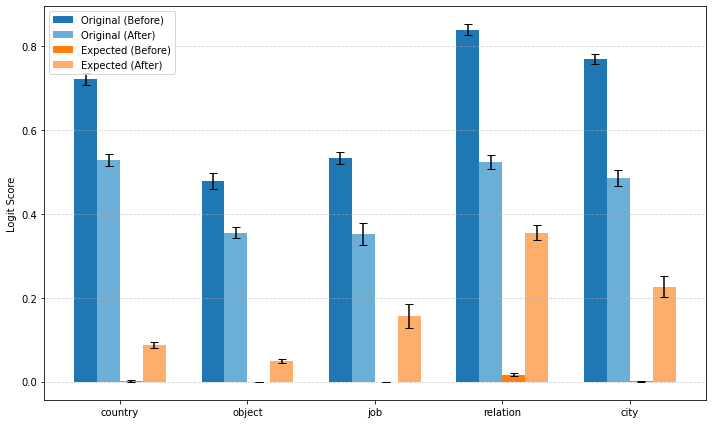

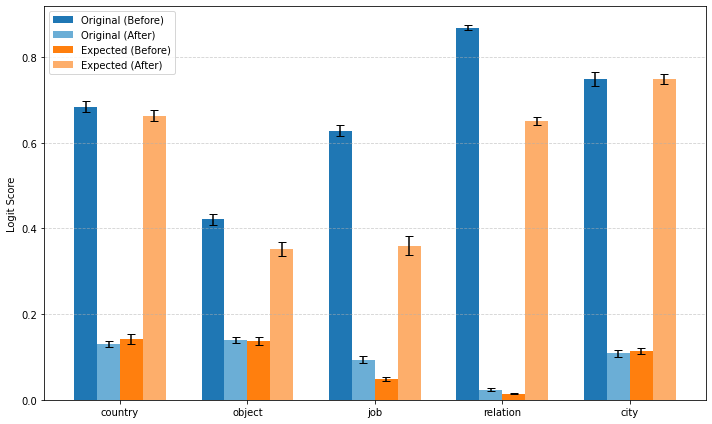

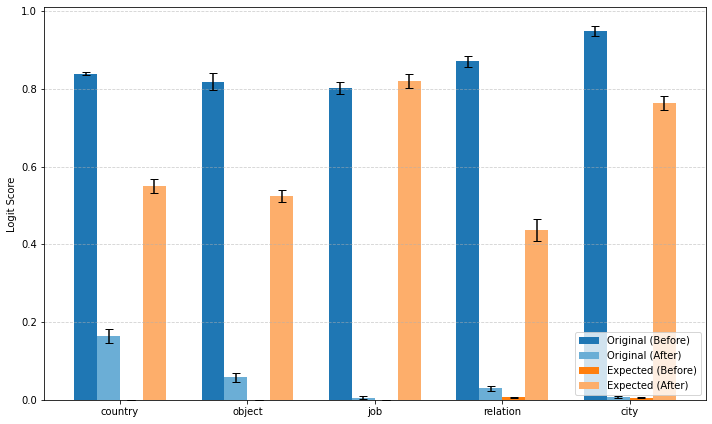

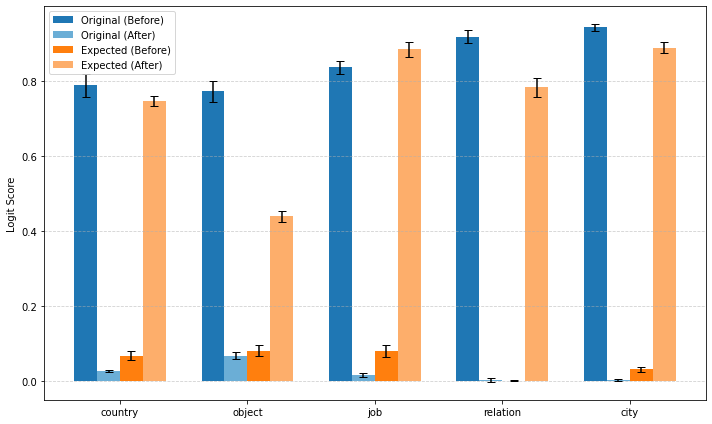

In [13]:
sd = "../result/steer/"
visualize_steer_results_all(sd, mod="llama", use_ent=True, use_acc=False)
visualize_steer_results_all(sd, mod="llama", use_ent=False, use_acc=False)
visualize_steer_results_all(sd, mod="qwen", use_ent=True, use_acc=False)
visualize_steer_results_all(sd, mod="qwen", use_ent=False, use_acc=False)

# Visualizing Sampling Results

### Visualizing Mod.

In [71]:
from matplotlib.colors import ListedColormap
from scipy import ndimage as ndi
from sklearn.neighbors import NearestNeighbors

In [72]:
import json, re
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap
from scipy import ndimage as ndi

def parse_and_merge(datasets):
    merged = {}
    merged_color = {}
    logits = []
    for i, data in enumerate(datasets):
        for k, v in data.items():
            match = re.search(r"\[([-\d\.\s,]+)\]", k)
            if not match:
                continue
            xy = tuple(np.fromstring(match.group(1), sep=","))
            v = np.array(v)
            logits.append(v[2])
            
    min_logits = sorted(list(set(logits)))[:10]
    
    for i, data in enumerate(datasets):
        for k, v in data.items():
            match = re.search(r"\[([-\d\.\s,]+)\]", k)
            if not match:
                continue
            xy = tuple(np.fromstring(match.group(1), sep=","))
            v = np.array(v)
            if xy not in merged:
                merged[xy] = v
                if v[2] in min_logits:
                    merged_color[xy] = 13
                else:
                    merged_color[xy] = i
            else:
                old = merged[xy]
                new = np.maximum(old, v)
                merged[xy] = new
                if new[2] == v[2]:
                    if new[2] in min_logits:
                        pass
                    else:
                        merged_color[xy] = i
    return merged, merged_color


def visualize_subspace(mod="llama", data_tp="city", use_acc=True, kind="interpolate", 
                       top_n=5, show_logit=True, show_color=False, show_line=True, calpha=0.5):
    sd = "/work01/daiqin/activation_patching/poe_project_copy/data/data_table_result_specific_context_grid/"#TODO
    lst_sf = [sd + f"ap_result_{mod}_{data_tp}_{inds}.json"
              for inds in ["1_1","1_2","1_3","2_1","2_2","2_3",
                           "3_1","3_2","3_3","4_1","4_2","4_3"]]

    # Load datasets
    datasets = []
    for sf in lst_sf:
        with open(sf, 'r') as f:
            datasets.append(json.load(f))

    merged, merged_color = parse_and_merge(datasets)

    coords = np.array(list(merged.keys()))
    scores = np.array(list(merged.values()))
    type_ids = np.array(list(merged_color.values()))

    # choose which score index to use
    score_index = 0 if use_acc else 2
    sc_tp = "Acc" if use_acc else "Logit"
    z = scores[:, score_index]

    region_labels = [
        "ei:1,ri:1","ei:2,ri:1","ei:3,ri:1",
        "ei:1,ri:2","ei:2,ri:2","ei:3,ri:2",
        "ei:1,ri:3","ei:2,ri:3","ei:3,ri:3",
        "ei:1,ri:4","ei:2,ri:4","ei:3,ri:4"
    ]

    region_cmap = ListedColormap([
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
        "#bcbd22", "#17becf", "#d55e00", "#cc79a7",
        "#56B4E9",
    ])

    # interpolation grid
    xi = np.linspace(coords[:,0].min(), coords[:,0].max(), 2000)
    yi = np.linspace(coords[:,1].min(), coords[:,1].max(), 2000)
    xi, yi = np.meshgrid(xi, yi)

    # interpolations
    zi = griddata(coords, z, (xi, yi), method="cubic")
    ti = griddata(coords, type_ids, (xi, yi), method="nearest")

    plt.figure(figsize=(6,5))

    # heatmap and region mask
    if show_logit:
        plt.pcolormesh(xi, yi, zi, cmap="viridis", shading="auto", alpha=1.0)
        plt.colorbar(label=f"{sc_tp} (raw)", shrink=0.8)
    if show_color:
        plt.pcolormesh(xi, yi, ti, cmap=region_cmap, shading="auto", alpha=calpha)
    if show_line:
        plt.contour(xi, yi, ti, levels=np.arange(len(region_labels)+1)-0.5, 
                    colors='black', linewidths=0.8, alpha=0.30)

    # ---------- improved labeling from interpolated mask ----------
    # ti is a 2D array of integer region ids on the interpolation grid
    # Pre-fit a KNN model on the original coordinates
    knn = NearestNeighbors(n_neighbors=min(100, len(coords)))
    knn.fit(coords)

    ti_int = np.round(ti).astype(int)

    for t in range(len(region_labels)):
        mask = (ti_int == t)
        # fallback: no predicted region
        if not np.any(mask):
            orig_mask = (type_ids == t)
            if np.any(orig_mask):
                sub_coords = coords[orig_mask]
                cx, cy = sub_coords[:,0].mean(), sub_coords[:,1].mean()
            else:
                continue
        else:
            # -----------------------
            # 1. Find connected region
            # -----------------------
            labeled, ncomp = ndi.label(mask)

            if ncomp == 0:
                orig_mask = (type_ids == t)
                if np.any(orig_mask):
                    sub_coords = coords[orig_mask]
                    cx, cy = sub_coords[:,0].mean(), sub_coords[:,1].mean()
                else:
                    continue
            else:
                # -----------------------------
                # 2. Largest connected component
                # -----------------------------
                comp_sizes = ndi.sum(mask, labeled, index=np.arange(1, ncomp+1))
                largest_comp = np.argmax(comp_sizes) + 1
                comp_mask = (labeled == largest_comp)

                ys, xs = np.where(comp_mask)

                # region center (rough center)
                region_cx = xi[ys, xs].mean()
                region_cy = yi[ys, xs].mean()
                region_center = np.array([[region_cx, region_cy]])

                # -----------------------------------------
                # 3. KNN search: find nearest original points
                # -----------------------------------------
                dists, inds = knn.kneighbors(region_center)
                inds = inds.flatten()
                dists = dists.flatten()

                # select top-N points nearest to region center
                order = np.argsort(dists)
                k = min(top_n, len(order))
                sel = order[:k]
                chosen = coords[inds[sel]]

                # -----------------------------------------
                # 4. Final centroid from selected samples
                # -----------------------------------------
                cx = chosen[:, 0].mean()
                cy = chosen[:, 1].mean()

        # clip inside bounds
        x_min, x_max = xi.min(), xi.max()
        y_min, y_max = yi.min(), yi.max()
        cx = np.clip(cx, x_min + 1e-6, x_max - 1e-6)
        cy = np.clip(cy, y_min + 1e-6, y_max - 1e-6)

        # draw label
        plt.text(cx, cy, region_labels[t],
                 ha='center', va='center', fontsize=11, fontweight='bold',
                 color='black',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))

    # colorbars
    #sm_region = plt.cm.ScalarMappable(cmap=region_cmap)
    #sm_region.set_array([])
    #cbar = plt.colorbar(sm_region, ticks=np.arange(len(region_labels)))
    #cbar.ax.set_yticklabels(region_labels)
    #cbar.set_label("Region / Data Type")
    
    if data_tp == "create":
        data_tp = "object"
    elif data_tp == "space":
        data_tp = "country"
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"story: {data_tp}")
    plt.tight_layout()
    plt.show()


### Visualizing ...

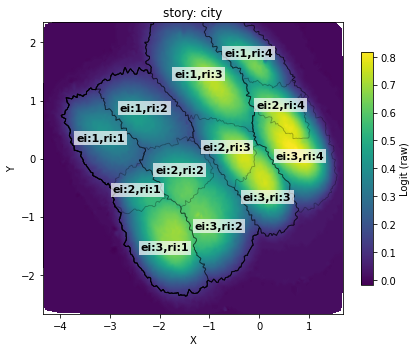

In [75]:
data_tps = ["city", "space", "relation", "job", "create"][:1]
for data_tp in data_tps:
    visualize_subspace(mod="llama", data_tp=data_tp, use_acc=False, top_n=50)

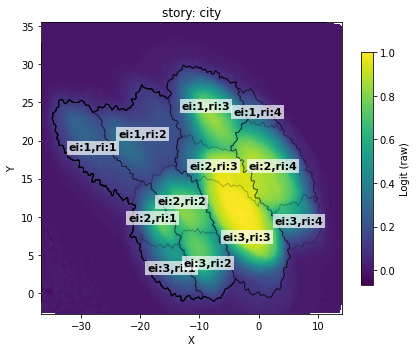

In [76]:
data_tps = ["city", "space", "relation", "job", "create"][:1]
for data_tp in data_tps:
    visualize_subspace(mod="qwen", data_tp=data_tp, use_acc=False, top_n=50)